In [4]:
from spectral_decomposition import spectrum
sampling_rate = 1000  # Hz
duration = 0.5 # seconds
aperiodic_exponent = 2.0
aperiodic_offset = 2.0
knee = 200
peaks = [{'freq': 12, 'amplitude': 1, 'sigma': 2}]

res = spectrum(
    sampling_rate=sampling_rate,
    duration=duration,
    aperiodic_exponent=aperiodic_exponent,
    aperiodic_offset=aperiodic_offset,
    knee=knee,
    peaks=peaks,
    average_firing_rate=0,
    random_state=42,
    direct_estimate=True,  # skip empirical PSD
    plot=False
)

In [28]:
import scipy
from scipy.signal import windows
from scipy.fft import fft
import numpy as np
import math
import matplotlib.pyplot as plt

def plot_single_taper(spectrum, taper_options, sampling_rate): 
    N = len(spectrum.time_domain.time)
    for i in taper_options:
        tapered_signal = res.time_domain.combined_signal * windows.get_window(i, N)
        freqs = np.fft.fftfreq(N, d=1/sampling_rate)[1:N//2] # starting from 1 to avoid a divide by 0 error later.
        fft_result = fft(tapered_signal)[1:N//2] / freqs**2
        plt.loglog(freqs, np.abs(fft_result), label=i, linewidth=1, alpha=0.5)
def plot_multi_taper(spectrum, duration, sampling_rate, isOneTaper=False):
    N = len(spectrum.time_domain.time)
    t_w = duration*sampling_rate/2 - 1 if (duration*sampling_rate/2==N/2) else duration*sampling_rate/2
    if isOneTaper:
        L = 1
    else:
        L = math.floor(t_w)-1
        print(L)
    tapered_signal = res.time_domain.combined_signal * windows.dpss(N, t_w, L)
    sum = np.zeros(N//2 - 1)
    freqs = np.fft.fftfreq(N, d=1/sampling_rate)[1:N//2] # starting from 1 to avoid a divide by 0 error later.
    for i in tapered_signal:
        fft_result = (fft(i)[1:N//2] / freqs**2)
        sum = (fft_result) + sum
    fft_result = sum / len(tapered_signal)
    plt.loglog(freqs, np.abs(fft_result), label='DPSS', linewidth=1, alpha=0.5)

248


/var/folders/qc/gskc2tx57z1gs3hq4hy86wfc0000gn/T/ipykernel_46799/758331593.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


Text(0.5, 1.0, "Single Taper (Not welch's method) vs Multitaper for 0.5 s window size")

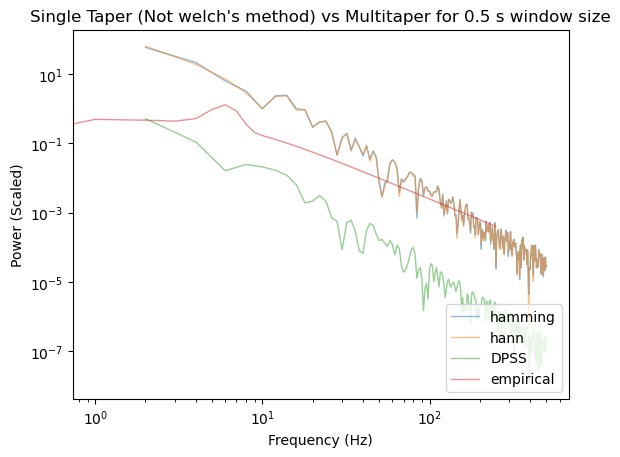

In [31]:
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (Scaled)")
plt.legend(loc="lower right")
plot_single_taper(res, taper_options=['hamming', 'hann'], sampling_rate=sampling_rate)
plot_multi_taper(res, duration=duration, sampling_rate=sampling_rate, isOneTaper=False)
plt.loglog(res.frequency_domain.combined_spectrum, linewidth=1, alpha=0.5, label='empirical')
plt.legend(loc="lower right")
plt.title("Single Taper (Not welch's method) vs Multitaper for 0.5 s window size")